In [1]:
import os.path
homedir = os.path.expanduser("~")
kaggle_home_dir = homedir + "/.kaggle"
kaggle_file = "kaggle.json"

kaggle_file = os.path.join(kaggle_home_dir, kaggle_file)
print(kaggle_file, type(kaggle_file), kaggle_file == '/home/iid/.kaggle/kaggle.json')

#!cat {kaggle_file}
#!pip install kaggle

!mkdir {kaggle_home_dir}



C:\Users\michal/.kaggle\kaggle.json <class 'str'> False


The syntax of the command is incorrect.


In [2]:
os.path.curdir
data_path = os.path.join(os.path.curdir, '../../data/titanic')
print(data_path)

.\../../data/titanic


In [ ]:
!kaggle competitions download -c titanic --path $data_path --force
!unzip $data_path/titanic.zip -d $data_path

2020-03-10 18:08:01,052 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f97087eaa50>: Failed to establish a new connection: [Errno 111] Connection refused')': /api/v1/competitions/data/download-all/titanic


In [3]:
# ! conda install -c anaconda seaborn 
import seaborn as sns
import numpy as np

In [4]:
!ls

Ch3-Classification.ipynb
Classification3-a-MNIST.ipynb
Classification3-b-shift-MNIST.ipynb
Classification3-c-Titanic.ipynb
Housing.ipynb
forest_reg.pkl


In [5]:
import os
import pandas as pd

def load_titanic_dateset(titanic_path='/content'):
  gender_submission_csv_path = os.path.join(titanic_path, "gender_submission.csv")
  train_csv_path = os.path.join(titanic_path, "train.csv")
  test_csv_path = os.path.join(titanic_path, "test.csv")
  return pd.read_csv(gender_submission_csv_path), pd.read_csv(train_csv_path), pd.read_csv(test_csv_path)
  #return pd.read_csv


In [6]:
#gender_sub_df, train_df, test_df = load_titanic_dateset(titanic_path='/home/iid/PycharmProjects/ml-playground/data/titanic/')
#gender_sub_df, train_df, test_df = load_titanic_dateset(titanic_path='/home/iid/PycharmProjects/ml-playground/data/titanic/')
gender_sub_df, train_df, test_df = load_titanic_dateset(titanic_path=data_path)



In [7]:
train_df.describe(), train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(       PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  , None)

In [8]:
train_df["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
CA 2144     6
3101295     6
           ..
113503      1
347085      1
28228       1
345778      1
228414      1
Name: Ticket, Length: 681, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011D48AEBD88>,
      dtype=object)

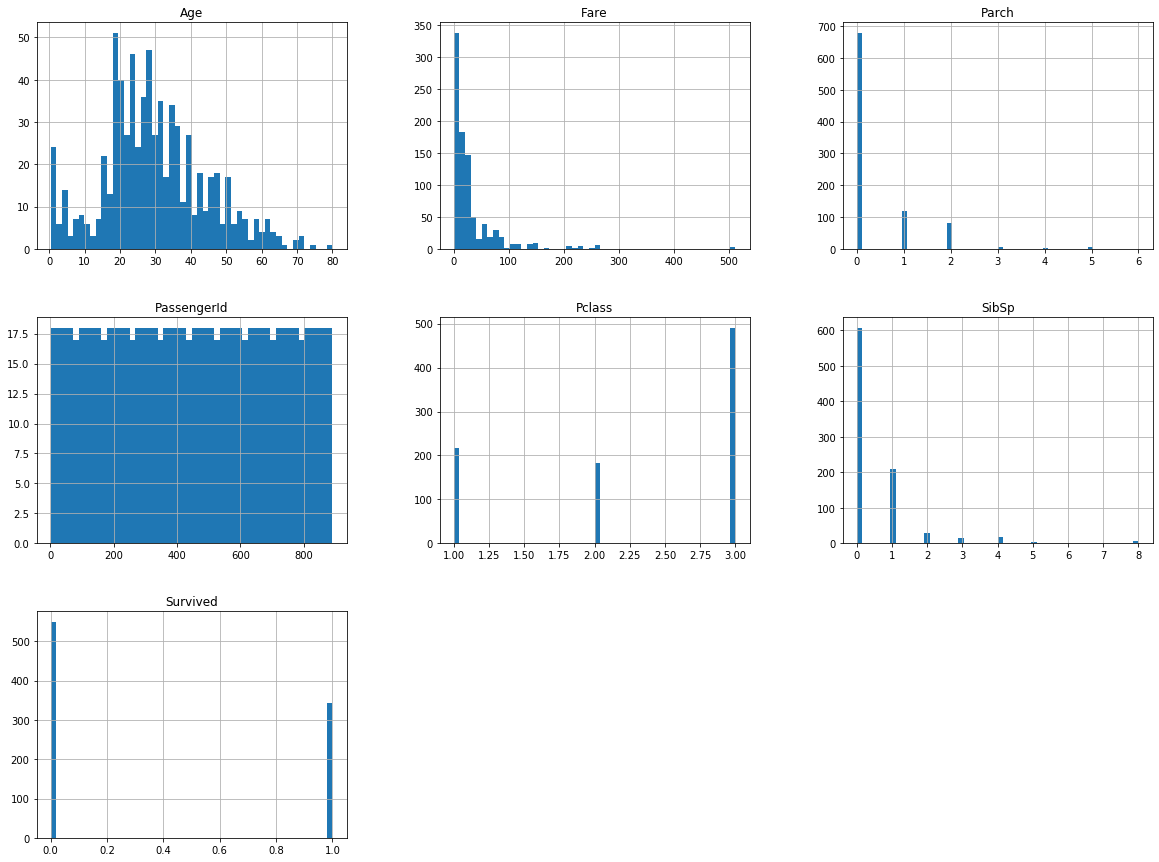

In [25]:
import matplotlib.pyplot as plt

train_df.hist(bins=50, figsize=(20,15))

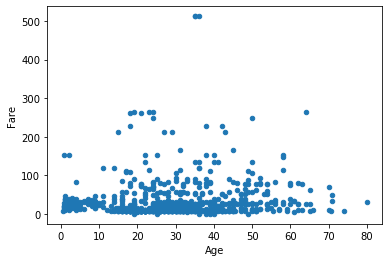

In [10]:
train_df.plot(kind="scatter", x="Age", y="Fare")

In [11]:
corr_matrix = train_df.corr()


In [12]:
# Survival is correlated to Fare price :) No shit sherlock :)
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [13]:
# PassengerId    891 non-null int64
# Survived       891 non-null int64
# Pclass         891 non-null int64
# Name           891 non-null object
# Sex            891 non-null object
# Age            714 non-null float64
# SibSp          891 non-null int64
# Parch          891 non-null int64
# Ticket         891 non-null object
# Fare           891 non-null float64
# Cabin          204 non-null object
# Embarked       889 non-null object

from pandas.plotting import scatter_matrix

attributes = ["Pclass", "Sex", "Age", "SibSp", "Fare", "Survived" ]
scatter_matrix(train[attributes], figsize=(24, 16))


NameError: name 'train' is not defined

In [ ]:
#train_df_data = train_df.drop("Survived", axis=1)
#train_df_labels = train_df["Survived"].copy()

In [14]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.head()

In [17]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [18]:
#sns.barplot(x='Pclass', y='Survived', data=train_df)
train_df['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [26]:
train_df_prep = None
test_df_prep = None

In [55]:
gender_sub_df, train_df, test_df = load_titanic_dateset(titanic_path=data_path)


In [27]:
def copy_data_to_prep():
    train_df_prep, test_df_prep = train_df.copy(), test_df.copy()
    return train_df_prep, test_df_prep

In [28]:
def get_train_test_datests():
    return train_df_prep, test_df_prep

In [29]:
# Drop id for training dataset, we are not interested in PassengerId
def dropPassengerId(train_df_prep):
    train_df_prep = train_df_prep.drop(["PassengerId"], axis=1)
    return train_df_prep
#data_prep

In [30]:
#train_df_prep["Cabin"].value_counts()
import re

def cabin_preprocessing(train_df_prep, test_df_prep):
    deckS = "ABCDEFGU"
    deckNum = "12345678"
    deckMap = dict(zip(deckS, deckNum))

    reg = re.compile("([a-zA-Z]+)")

    for prep_dataset in get_train_test_datests():
        prep_dataset["Cabin"] = prep_dataset["Cabin"].fillna("UO")
        prep_dataset["Deck"] = prep_dataset["Cabin"].map(lambda x: reg.search(x).group())
        prep_dataset["Deck"] = prep_dataset["Deck"].map(deckMap)
        prep_dataset["Deck"] = prep_dataset["Deck"].fillna(0)
        prep_dataset["Deck"] = prep_dataset["Deck"].astype(int)

    train_df_prep = train_df_prep.drop(['Cabin'], axis=1)  
    test_df_prep = test_df_prep.drop(['Cabin'], axis=1)  

    return train_df_prep, test_df_prep
#train_df_prep["Deck"].value_counts(), test_df_prep["Deck"].value_counts()

In [46]:
from sklearn.preprocessing import OrdinalEncoder

def sex_preprocessing(train_df_prep, test_df_prep):
    sex_category_mapping = {"male" : 0, "female" : 1}

    for prep_dataset in get_train_test_datests():
        sex_encoder = OrdinalEncoder(dtype=np.int32)
        prep_dataset[["Sex"]] = sex_encoder.fit_transform(prep_dataset[["Sex"]])
        prep_dataset["Sex"] = prep_dataset["Sex"].astype('category')
        #prep_dataset['Sex'] = prep_dataset['Sex'].map(sex_category_mapping)
    return train_df_prep, test_df_prep

In [32]:
# Age - fill missing values
# Use SimpleImputer

import numpy as np
from sklearn.impute import SimpleImputer

def age_preprocessing(train_df_prep, test_df_prep):
    for prep_dataset in get_train_test_datests():
        #imputer = KNNImputer(n_neighbors=2, weights="uniform")
        age_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_dataset[["Age"]] = age_imputer.fit_transform(prep_dataset[["Age"]])
        prep_dataset["Age"] = prep_dataset["Age"].astype(int)
    return train_df_prep, test_df_prep

In [33]:
# Combine SibSp and Parch
def relatives_preprocessing(train_df_prep, test_df_prep):
    for prep_dataset in get_train_test_datests():
        #imputer = KNNImputer(n_neighbors=2, weights="uniform")
        prep_dataset["Relatives"] = prep_dataset["SibSp"] + prep_dataset['Parch']
        prep_dataset.loc[prep_dataset['Relatives'] > 0, 'alone'] = 0
        prep_dataset.loc[prep_dataset['Relatives'] == 0, 'alone'] = 1
        #prep_dataset['alone'] = prep_dataset['alone'].astype(int)
        prep_dataset["alone"] = prep_dataset["alone"].astype('category')
    
    train_df_prep = train_df_prep.drop(['SibSp'], axis=1)
    train_df_prep = train_df_prep.drop(['Parch'], axis=1)
    test_df_prep = test_df_prep.drop(['SibSp'], axis=1)  
    test_df_prep = test_df_prep.drop(['Parch'], axis=1)
    
    return train_df_prep, test_df_prep

In [48]:
# Embarked - fill missing values with median
# Use SimpleImputer 'most_frequent'

import numpy as np

from sklearn.impute import SimpleImputer

def embarked_preprocessing(train_df_prep, test_df_prep):
    for prep_dataset in get_train_test_datests():
        embarked_imputer = SimpleImputer(strategy='most_frequent')
        embarked_encoder = OrdinalEncoder(dtype=np.int32)
        prep_dataset[["Embarked"]] = embarked_imputer.fit_transform(prep_dataset[["Embarked"]])
        prep_dataset[["Embarked"]] = embarked_encoder.fit_transform(prep_dataset[["Embarked"]])
        prep_dataset["Embarked"] = prep_dataset["Embarked"].astype('category')
        
    return train_df_prep, test_df_prep

In [35]:
# Fare - fill missing values with median

import numpy as np

from sklearn.impute import SimpleImputer

def fare_preprocessing(train_df_prep, test_df_prep):
    for prep_dataset in get_train_test_datests():
        prep_dataset["Fare"] = prep_dataset["Fare"].fillna(0)
        prep_dataset["Fare"] = prep_dataset["Fare"].astype(int)

    return train_df_prep, test_df_prep

In [36]:
# Ticket - drop the ticket

import numpy as np

from sklearn.impute import SimpleImputer

def ticket_preprocessing(train_df_prep, test_df_prep):
    train_df_prep = train_df_prep.drop(["Ticket"], axis=1)
    test_df_prep = test_df_prep.drop(["Ticket"], axis=1)
        
    return train_df_prep, test_df_prep

In [37]:
# PClass - make it categorical

import numpy as np

from sklearn.impute import SimpleImputer

def pclass_preprocessing(train_df_prep, test_df_prep):
    for prep_dataset in get_train_test_datests():
        prep_dataset["Pclass"] = prep_dataset["Pclass"].astype('category')
        
    return train_df_prep, test_df_prep

In [38]:
# Name - drop

import numpy as np

from sklearn.impute import SimpleImputer

def name_preprocessing(train_df_prep, test_df_prep):
    train_df_prep = train_df_prep.drop(["Name"], axis=1)
    test_df_prep = test_df_prep.drop(["Name"], axis=1)
    #for prep_dataset in get_train_test_datests():
    #    prep_dataset["Pclass"] = prep_dataset["Pclass"].astype('category')
        
    return train_df_prep, test_df_prep

In [39]:
def drop_survived(train_df_prep, test_df_prep):
    X_train = train_df_prep.drop(["Survived"], axis=1) 
    y_train = train_df_prep["Survived"]
    X_test = test_df_prep.drop(["PassengerId"], axis=1).copy()
    return X_train, y_train, X_test

In [40]:
train_df_prep[["Name"]].sample(10)
#test_df_prep['Embarked'].value_counts()

TypeError: 'NoneType' object is not subscriptable

In [41]:
train_df_prep.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [49]:
train_df_prep, test_df_prep = copy_data_to_prep()
train_df_prep = dropPassengerId(train_df_prep)
train_df_prep, test_df_prep = cabin_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = sex_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = age_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = relatives_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = embarked_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = fare_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = ticket_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = pclass_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = name_preprocessing(train_df_prep, test_df_prep)

X_train, y_train, X_test = drop_survived(train_df_prep, test_df_prep)


/home/iid/anaconda3/envs/ml-tensorflow/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


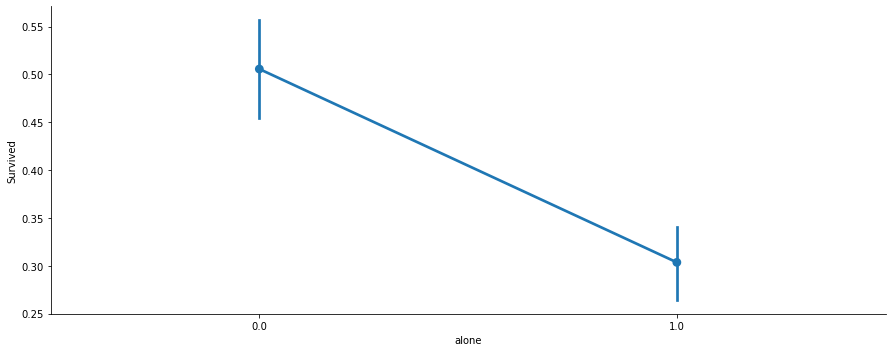

In [50]:
axes = sns.factorplot('alone','Survived', 
                      data=train_df_prep, aspect = 2.5, )

In [51]:
from sklearn import linear_model

sgd = linear_model.SGDClassifier()

sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

print("acc_sgd: {}".format(sgd.score(X_train, y_train) * 100))

acc_sgd: 60.1571268237935


In [56]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest)

96.75


In [233]:
#list(prep_dataset.select_dtypes(include ='float64'))
#prep_dataset["Sex"] = prep_dataset["Sex"].astype(int)
train_df_prep['Pclass'].unique()

array([3, 1, 2], dtype=int64)

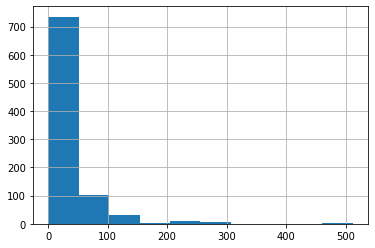

In [208]:
train_df_prep['Fare'].hist()

In [ ]:
X_train = tra

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
 ('imputer')                        
])

In [18]:
#numeric_features = train.select_dtypes(include=['int64', 'float64']).columns
train_df.columns.get_indexer


<bound method Index.get_indexer of Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')>

In [22]:
type(train_df['Ticket'].num)


pandas.core.series.Series

In [ ]:
train_df_prep, test_df_prep = copy_data_to_prep()
train_df_prep = dropPassengerId(train_df_prep)
train_df_prep, test_df_prep = cabin_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = sex_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = age_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = relatives_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = embarked_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = fare_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = ticket_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = pclass_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = name_preprocessing(train_df_prep, test_df_prep)

In [259]:
train_df[["Name"]]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [411]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

import re

title_reg = re.compile("([a-zA-Z]+)\.")

titles = {"": 0, "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
misspell_map = {"Mlle" : "Miss", "Ms" : "Miss", "Mme": "Mrs"}

def title_category_num(name):
    return titles.get(name, titles["Other"])
    
def correct_misspell(name):
    if name in misspell_map:
        return misspell_map[name]
    return name

def get_title(name):
    title_search = title_reg.search(name)
    if title_search :
        return correct_misspell(title_search.group(1))
    return ""

class ColumnDropTranformer(BaseEstimator, TransformerMixin):   
    def __init__(self, to_drop): # no *args or *kargs
        self.columns_to_drop = to_drop
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        # Assumes X is a DataFrame
        X = X.drop(columns=self.columns_to_drop, axis=1) 
        return X

class CabinTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self): # no *args or *kargs
        self.reg = re.compile("([a-zA-Z]+)")
        self.deckMap = dict(zip("ABCDEFGU", "12345678"))
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        # Assumes X is a DataFrame
        X["Cabin"] = X["Cabin"].fillna("UO")
        X["Deck"] = X["Cabin"].map(lambda x: self.reg.search(x).group())
        X["Deck"] = X["Deck"].map(self.deckMap)
        X["Deck"] = X["Deck"].fillna(0)
        X["Deck"] = X["Deck"].astype(int)
        X = X.drop(['Cabin'], axis=1)
        return X
    
class NameTransformer(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or *kargs
        self.title_reg = re.compile("([a-zA-Z]+)\.")
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        # Assumes X is a DataFrame
        X["Title"] = X["Name"].apply(get_title)
        X["Title_Cat"] = X["Title"].apply(title_category_num)
        X["Title_Cat"] = X["Title_Cat"].fillna(0)
        #X["Title"] = pd.Categorical(X["Title"], ordered=False)
        X = X.drop(["Name"], axis=1)
        X = X.drop(["Title"], axis=1)
        return X

class GenderTranformer(BaseEstimator, TransformerMixin): # sic!
    
    def __init__(self): # no *args or *kargs
        # By default, the strings will be assigned numbers in increasing alphabetical order
        self.sex_category_mapping = ["male", "female"]
        #self.sex_encoder = OrdinalEncoder(dtype=np.int32, categories=self.sex_category_mapping)
        self.sex_encoder = OrdinalEncoder(dtype=np.int32)
        #mapping={'col': 'grade', 'mapping': map_for_grades}, return_df=True)
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        # Assumes X is a DataFrame
        X[["Sex"]] = self.sex_encoder.fit_transform(X[["Sex"]])
        #X["Sex"] = X["Sex"].astype('category')
        return X
    
class AgeImputerTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self): # no *args or *kargs
        # By default, the strings will be assigned numbers in increasing alphabetical order
        self.age_imputer = SimpleImputer(strategy='mean')
        #self.age_scaler = StandardScaler()
    def fit(self, X, y=None):
        self.age_imputer.fit(X[["Age"]])
        #self.age_scaler.fit(X[["Age"]])
        return self # nothing else to do
    def transform(self, X):
        # Assumes X is a DataFrame
        X[["Age"]] = self.age_imputer.transform(X[["Age"]])
        #X[["Age"]] = self.age_scaler.transform(X[["Age"]])
        return X
    
class RelativesTransformer(BaseEstimator, TransformerMixin): 
    
    def __init__(self): # no *args or *kargs
        # By default, the strings will be assigned numbers in increasing alphabetical order
        pass
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        # Assumes X is a DataFrame
        X["Relatives"] = X["SibSp"] + X['Parch']
        X.loc[X['Relatives'] > 0, 'Alone'] = 0
        X.loc[X['Relatives'] == 0, 'Alone'] = 1
        #X["alone"] = X["alone"].astype('category')
        X["Alone"] = X["Alone"].astype(int)
        X = X.drop(['SibSp'], axis=1)
        X = X.drop(['Parch'], axis=1)
        return X
    
class EmbarkedImputerTransformer(BaseEstimator, TransformerMixin): 
    
    def __init__(self): # no *args or *kargs
        # By default, the strings will be assigned numbers in increasing alphabetical order
        self.embarked_imputer = SimpleImputer(strategy='most_frequent')
    def fit(self, X, y=None):
        self.embarked_imputer.fit(X[["Embarked"]])
        return self # nothing else to do
    def transform(self, X):
        # Assumes X is a DataFrame
        X[["Embarked"]] = self.embarked_imputer.transform(X[["Embarked"]])
        #X["Embarked"] = X["Embarked"].astype('category')
        return X

class EmbarkedEncoderTransformer(BaseEstimator, TransformerMixin): 
    
    def __init__(self): # no *args or *kargs
        # By default, the strings will be assigned numbers in increasing alphabetical order
        self.embarked_encoder = OrdinalEncoder(dtype=np.int32)
    def fit(self, X, y=None):
        self.embarked_encoder.fit(X[["Embarked"]])
        return self # nothing else to do
    def transform(self, X):
        # Assumes X is a DataFrame
        X[["Embarked"]] = self.embarked_encoder.transform(X[["Embarked"]])
        return X
    
class FareTransformer(BaseEstimator, TransformerMixin): 
    
    def __init__(self): # no *args or *kargs
        # By default, the strings will be assigned numbers in increasing alphabetical order
        self.fareScaler = StandardScaler()
    def fit(self, X, y=None):
        X["Fare"] = X["Fare"].fillna(0)
        self.fareScaler.fit(X[["Fare"]])
        return self # nothing else to do
    def transform(self, X):
        # Assumes X is a DataFrame
        X["Fare"] = X["Fare"].fillna(0)
        X[["Fare"]] = self.fareScaler.transform(X[["Fare"]])
        #X["Fare"] = X["Fare"].astype(int)
        return X
    
class CategoryTypeTransformer(BaseEstimator, TransformerMixin): 
    
    def __init__(self, columns): # no *args or *kargs
        # By default, the strings will be assigned numbers in increasing alphabetical order
        self.columns = columns
        pass
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        # Assumes X is a DataFrame
        X[self.columns] = X[self.columns].astype('category')
        return X
    
class ScalerTransformer(BaseEstimator, TransformerMixin): 
    
    def __init__(self, columns): # no *args or *kargs
        # By default, the strings will be assigned numbers in increasing alphabetical order
        self.scaler = StandardScaler()
        self.columns = columns
        pass
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns])
        return self # nothing else to do
    def transform(self, X):
        # Assumes X is a DataFrame
        X[self.columns] = self.scaler.transform(X[self.columns])
        return X

#print(title_category_num("Mrs"))  


#title_reg.search("Mr. Goose").group(1)

In [412]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


cabinT = CabinTransformer()
genderT = GenderTranformer()
nameT = NameTransformer()
ageIST = AgeImputerScalerTransformer()
relativesT = RelativesTransformer()
embarkedIT = EmbarkedImputerTransformer()
embarkedET = EmbarkedEncoderTransformer()
fareT = FareTransformer()
categoryT = CategoryTypeTransformer(columns=["Embarked", "Alone", "Sex", "Title_Cat"])
columnDropT = ColumnDropTranformer(to_drop=["PassengerId", "Ticket"])
scalerT = ScalerTransformer(columns=["Age"])
# train_df_transformed = ct.fit_transform(train_df)

preprocess_pipeline = Pipeline([
    ('column_drop', columnDropT), 
    ('cabin_transformer', cabinT), 
    ('name_transformer', nameT),
    ('gender_transformer', genderT),
    ('age_transformer', ageIST),
    ('relatives_transformer', relativesT),
    ('embarked_imputer_transformer', embarkedIT),
    ('embarked_encoder_transformer', embarkedET),
    ('fare_transformer', fareT),
    ('category_transformer', categoryT),
])


In [413]:
gender_sub_df, train_df, test_df = load_titanic_dateset(titanic_path=data_path)

#train_target =  train_df.survived.values
#features = titanic[['pclass', 'sex', 'age', 'fare', 'embarked']].copy()

train_df_data = train_df.drop("Survived", axis=1).copy()
train_df_labels = train_df[["Survived"]].copy()

test_df_data = test_df.copy()

#test_df_labels = test_df["Survived"].copy()


#model = make_pipeline(preprocess_pipeline, verbose=True)

X_train_transformed = preprocess_pipeline.fit_transform(train_df_data)
X_test_transformed = preprocess_pipeline.transform(test_df_data)

#X_train, X_val, y_train, y_val = train_test_split(train_df_data, train_df_labels, random_state=0)

#print("logistic regression score: %f" % model.score(X_test, y_test))

#lr =  LogisticRegression(max_iter=10**4)

#lr.fit(X_train_transformed, y_train)
#print("logistic regression score: %f" % lr.score(X_val_transformed, y_val))

#gs = GridSearchCV(ml_pipe, param_grid, cv=kf)
#gs.fit(train, y)
#gs.best_params_



In [414]:
X_train_transformed
#X_train_transformed["Title"].value_counts()
#X_train_transformed["Title_Cat"].value_counts()
#train_df["Name"].value_counts()
#X_train_transformed["Embarked"].value_counts()
#train_df_data["Embarked"]
#X_train_transformed["Embarked"].isnull().sum()

,Pclass,Sex,Age,Fare,Embarked,Deck,Title_Cat,Relatives,Alone
0,3,1,-0.530377,-0.502445,2,0,1,1,0
1,1,0,0.571831,0.786845,0,3,3,1,0
2,3,0,-0.254825,-0.488854,2,0,2,0,1
3,1,0,0.365167,0.420730,2,3,3,1,0
4,3,1,0.365167,-0.486337,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,-0.185937,-0.386671,2,0,5,0,1
887,1,0,-0.737041,-0.044381,2,2,2,0,1
888,3,0,0.000000,-0.176263,2,0,2,3,0
889,1,1,-0.254825,-0.044381,0,3,1,0,1


In [12]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]


for classifier in classifiers:
    #pipe = Pipeline(steps=[('preprocessor', preprocessor),
    #                  ('classifier', classifier)])
    
    classifier.fit(X_train_transformed, y_train)
    
    print(classifier)
    print("model score: %.3f" % classifier.score(X_val_transformed, y_val))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score: 0.695
SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
model score: 0.628
NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
model score: 0.789
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                  

In [36]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=123)
rfc = RandomForestClassifier()

cvs = cross_val_score(rfc, X_train_transformed, train_df_labels, cv=kf)
print(cvs, cvs.mean(), cvs.std())

[0.82681564 0.8258427  0.74719101 0.80898876 0.80898876] 0.8035653756826313 0.02923610501797776


In [ ]:
from sklearn.model_selection import GridSearchCV
knn_clf = KNeighborsClassifier()
params = {
        'n_neighbors': [3, 5, 7, 9, 11] # usually odd numbers
    }

grid_clf = GridSearchCV(estimator=knn_clf, 
                   param_grid=params, cv=5, return_train_score=True) # Turn on cv train scores

grid_clf.fit(X_train_transformed, train_df_labels)

#print(grid_clf.best_params_, grid_clf.best_estimator_, grid_clf.
pd.DataFrame(grid_clf.cv_results_)[["rank_test_score", "params", "mean_test_score"]]\
    .sort_values(by="rank_test_score").head(5)
#pd.DataFrame(grid_clf.cv_results_)


In [96]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5],
    'criterion' :['gini', 'entropy']
}

rf_clf = RandomForestClassifier()

grid_clf = GridSearchCV(estimator=rf_clf, 
                   param_grid=param_grid, cv=5, return_train_score=True, verbose=1) # Turn on cv train scores

grid_clf.fit(X_train_transformed, train_df_labels)

#print(grid_clf.best_params_, grid_clf.best_estimator_, grid_clf.
pd.DataFrame(grid_clf.cv_results_)[["rank_test_score", "params", "mean_test_score", "mean_train_score"]]\
    .sort_values(by="rank_test_score").head(10)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   33.2s finished


,rank_test_score,params,mean_test_score,mean_train_score
12,1,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.819365,0.862514
4,2,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.817124,0.864198
7,3,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.813759,0.867004
5,4,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.813753,0.865321
0,5,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.811525,0.843713
6,6,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.811506,0.863079
3,7,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.810407,0.847080
15,8,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.810389,0.863075
1,9,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.809296,0.843994
9,10,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.809278,0.840907


In [415]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from collections import namedtuple

Classifier_Params = namedtuple('Classifier_Params', 'classifier param_grid')

parameters_grid_to_search = []


rfc_params = Classifier_Params(classifier=RandomForestClassifier(), 
                                param_grid = { 'n_estimators': [200, 500], 
                             'max_features': ['auto', 'sqrt', 'log2'],
                                'max_depth' : [4,5,6,7,8,9, 10],
                            'criterion' :['gini', 'entropy']
                        }
    )

rfc_params2 = Classifier_Params(classifier=RandomForestClassifier(), 
                                param_grid = { 'n_estimators': [100, 200], 
                             'max_features': ['auto', 'sqrt', 'log2'],
                                'max_depth' : [8,9],
                            'criterion' :['gini', 'entropy']
                        }
    )
                               
svc_params = Classifier_Params(classifier=SVC(), 
                                param_grid = [
  {'C': [0.3, 1, 3, 10], 'kernel': ['linear']},
  {'C': [0.3, 1, 3, 10, 100], 'gamma': [0.001, 0.003, 0.0001], 'kernel': ['rbf']},
]
    )

adaboost_params = Classifier_Params(classifier=AdaBoostClassifier(), 
    param_grid = {'learning_rate': [0.1, 0.3, 1.0], 'n_estimators' : [30, 50, 100] } 
    )

decisiontree_params = Classifier_Params(classifier=DecisionTreeClassifier(), 
    param_grid = {'criterion':['gini','entropy'],
                  'min_samples_split' : range(10,500,20),
                  'max_depth':[6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150] 
                 } 
    )

gradient_boosting_parameters =  Classifier_Params(classifier=GradientBoostingClassifier(),
    param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8,11,13],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[20]
                }
    )
#parameters_grid_to_search = [svc_params]
#parameters_random_to_search = []

parameters_grid_to_search = [
    #svc_params, 
    rfc_params2, 
    adaboost_params, 
    decisiontree_params]
parameters_random_to_search = [gradient_boosting_parameters]

results = []
best_estimators = []

for params in parameters_grid_to_search:
    grid_clf = GridSearchCV(estimator=params.classifier, 
                   param_grid=params.param_grid, cv=5, return_train_score=False, verbose=1, n_jobs=-2) # Turn on cv train scores
    
    grid_clf.fit(X_train_transformed, train_df_labels)

    df = pd.DataFrame(grid_clf.cv_results_)[["rank_test_score", "params", "mean_test_score"]]\
    .sort_values(by="mean_test_score", ascending=False).head(5)
    df['estimator_name'] = grid_clf.estimator.__class__.__name__
    results.append((grid_clf, df))
    best_estimators.append((grid_clf.best_estimator_, df.head(1)))

for params in parameters_random_to_search:
    random_clf = RandomizedSearchCV(estimator=params.classifier, 
                   param_distributions=params.param_grid, cv=5, return_train_score=False, verbose=1, n_jobs=-2, n_iter=3000) # Turn on cv train scores
    
    random_clf.fit(X_train_transformed, train_df_labels)

    df = pd.DataFrame(random_clf.cv_results_)[["rank_test_score", "params", "mean_test_score"]]\
    .sort_values(by="mean_test_score", ascending=False).head(5)
    df['estimator_name'] = random_clf.estimator.__class__.__name__
    results.append((random_clf, df))
    best_estimators.append((random_clf.best_estimator_, df.head(1)))


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done 450 out of 450 | elapsed:  1.4min finished
c:\Users\michal\Anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  45 out of  45 | elapsed:    1.3s finished
c:\Users\michal\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-2)]: Done 366 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done 4000 out of 4000 | elapsed:    6.2s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


[Parallel(n_jobs=-2)]: Done 278 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-2)]: Done 2078 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-2)]: Done 5078 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-2)]: Done 9278 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-2)]: Done 14678 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-2)]: Done 15000 out of 15000 | elapsed:  1.4min finished
c:\Users\michal\Anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [420]:
best_estimators_sorted = sorted(best_estimators, key=lambda est: est[1]["mean_test_score"].item(), reverse=True)
#for est in best_estimators:
#    print(est[1]["mean_test_score"].item())

#best_estimators[0][1]["mean_test_score"]
top_estimator = best_estimators_sorted[0][0]



c:\Users\michal\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `item` has been deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,rank_test_score,params,mean_test_score,estimator_name
0,1,"{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 800}",0.837261,RandomForestClassifier
1,2,"{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}",0.837254,RandomForestClassifier
2,3,"{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 500}",0.836131,RandomForestClassifier
3,4,"{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 800}",0.836125,RandomForestClassifier
4,5,"{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 800}",0.835013,RandomForestClassifier
5,1,"{'criterion': 'gini', 'max_depth': 120, 'min_samples_split': 30}",0.826031,DecisionTreeClassifier
6,1,"{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 30}",0.826031,DecisionTreeClassifier
7,1,"{'criterion': 'gini', 'max_depth': 70, 'min_samples_split': 30}",0.826031,DecisionTreeClassifier
8,4,"{'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 110}",0.826018,DecisionTreeClassifier
9,4,"{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 110}",0.826018,DecisionTreeClassifier


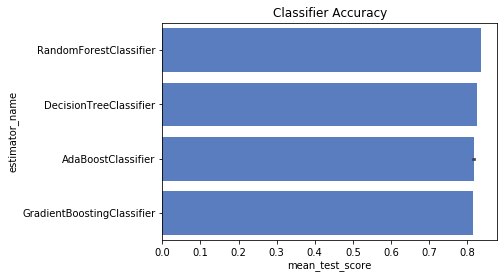

In [421]:
# old best 
# {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 200} 	0.831674 	RandomForestClassifier
#end_dataframe = results[0][1].copy()
end_dataframe = pd.DataFrame()

for grid_clf, df in results:
    end_dataframe = end_dataframe.append(df)
    
end_dataframe_sorted = end_dataframe.sort_values(by="mean_test_score", ascending=False)
end_dataframe_sorted = end_dataframe_sorted.reset_index(drop=True)


from IPython.core.display import HTML
display(HTML(end_dataframe_sorted.to_html()))

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='mean_test_score', y='estimator_name', data=end_dataframe_sorted, color="b")
#results[0][0].cv_results_
                    
#df_test['Btime'].iloc[0]
#end_dataframe_sorted.iloc[0]['params']

#end_dataframe_sorted[['params']]

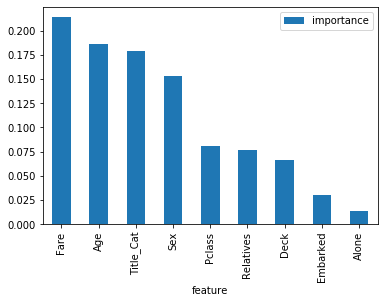

In [422]:
top_estimator.feature_importances_

importances = pd.DataFrame({'feature':X_train_transformed.columns, 'importance':np.round(top_estimator.feature_importances_, 3)})

importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.head(15)

importances.plot.bar()

In [423]:
best_estimators_sorted = sorted(best_estimators, key=lambda est: est[1]["mean_test_score"].item(), reverse=True)

top_estimator = best_estimators_sorted[0][0]

print("model score: %.3f" % top_estimator.score(X_train_transformed, train_df_labels))

best_estimator_prediction = pd.DataFrame(top_estimator.predict(X_test_transformed), columns=["Survived"])


df_to_submit = best_estimator_prediction.join(test_df[["PassengerId"]], how='left')
df_to_submit = df_to_submit[['PassengerId', 'Survived']]
#df_to_submit["Survived"].value_counts()
df_to_submit.to_csv('submission.csv',index=False)

#list(df_to_submit.columns.values)

model score: 0.946


c:\Users\michal\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `item` has been deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [424]:
!kaggle competitions submit -c titanic -f submission.csv -m "With extra Titles"

Successfully submitted to Titanic: Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:03<00:00, 954B/s]


In [215]:
#X_train_transformed
#train_df_labels
train_df[["PassengerId"]]
#gender_sub_df["Survived"].mean()
gender_sub_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
